In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from mlxtend.plotting import plot_decision_regions


In [6]:



# Load your dataset (replace with your actual file path)
data = pd.read_csv('train.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['id'])
data_cleaned.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


In [7]:
smokin_corr = data_cleaned.corr()['smoking'].to_frame().T
smokin_corr.style.background_gradient(cmap='coolwarm') 

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
smoking,-0.193103,0.494092,0.399787,0.300887,0.128234,0.134564,-0.007418,-0.002186,0.123260,0.152125,0.103526,-0.034782,0.345541,-0.290750,-0.035665,0.503442,-0.008566,0.351120,0.101480,0.241721,0.377667,0.148421,1.000000


In [8]:

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['smoking'])
y = data_cleaned['smoking']


In [9]:

skf = StratifiedKFold(5)
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.7986666666666666
ROC AUC Score: 0.880813447155426


In [10]:
# Test ma'lumotlarini yuklash
test_data = pd.read_csv('test.csv')

# O'rganish uchun ishlatilgan barcha ustunlar nomini olish va ro'yxatga aylantirish
train_columns = list(X_train.columns)

# Test to'plamidan faqat o'rgatilgan ustunlarni tanlash
test_data_prepared = test_data[train_columns]  # Faqat modelda ishlatilgan ustunlarni tanlaymiz

# Test ma'lumotlar to'plamidagi smoking qiymatlarini bashorat qilish
test_predictions = rf_model.predict_proba(test_data_prepared)[:, 1]  # Faqat smoking ehtimolini olamiz

# Test natijalarini yangi DataFrame ga yig'ish
submission = pd.DataFrame({
    'id': test_data['id'],   # test datasidagi ID ustuni
    'smoking': test_predictions   # bashorat qilingan smoking ehtimollari
})

# Yangi CSV faylga natijalarni saqlash
submission.to_csv('prediction.csv', index=False)

print("Bashoratlar 'prediction.csv' fayliga muvaffaqiyatli saqlandi.")


Bashoratlar 'prediction.csv' fayliga muvaffaqiyatli saqlandi.


[I 2024-11-04 14:27:52,015] A new study created in memory with name: no-name-17187636-af53-419d-8f92-b436af5e8ada
[I 2024-11-04 14:28:02,740] Trial 0 finished with value: 0.8819684198188742 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:28:36,454] Trial 1 finished with value: 0.8707545514743813 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 9, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:28:49,450] Trial 2 finished with value: 0.8803188626297208 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:29:01,856] Trial 3 finished with value: 0.8825314611078223

Best Hyperparameters from Optuna: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True, 'max_features': 'sqrt'}
Accuracy: 0.801
ROC AUC: 0.88832461051029
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1878
         1.0       0.72      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.81      0.80      0.80      3000



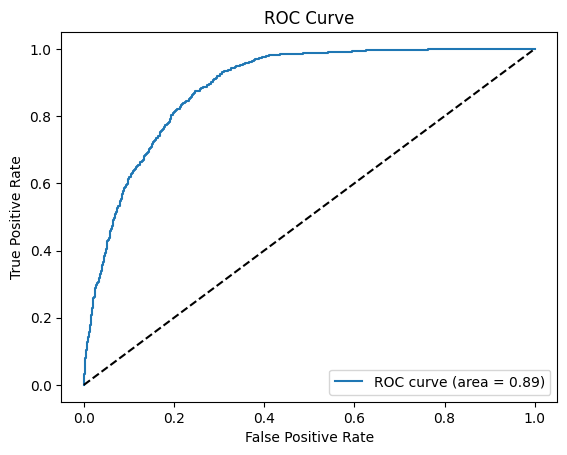

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna with X_train and y_train as arguments
def objective(trial, X_train, y_train):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Create RandomForest model with suggested parameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        max_features=max_features,
        random_state=42
    )
    
    # Perform cross-validation and return the mean ROC AUC score
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    
    return score

# Optuna study setup
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, timeout=600)  # Pass X_train and y_train

# Best parameters from the study
best_params = study.best_params
print(f"Best Hyperparameters from Optuna: {best_params}")

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the probability for the 'smoking' class for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_rf.predict_proba(test_features)[:, 1]  # Select probabilities for the 'smoking' class

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_optuna_rf.csv', index=False)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, brier_score_loss
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna with X_train and y_train as arguments
def objective(trial, X_train, y_train):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Create RandomForest model with suggested parameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        max_features=max_features,
        random_state=42
    )
    
    # Calibrate the model
    calibrated_rf = CalibratedClassifierCV(rf, method='sigmoid', cv='prefit')
    
    # Perform cross-validation and return the mean ROC AUC score
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    
    return score

# Optuna study setup
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, timeout=600)  # Pass X_train and y_train

# Best parameters from the study
best_params = study.best_params
print(f"Best Hyperparameters from Optuna: {best_params}")

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Calibrate the trained model
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv='prefit')
calibrated_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = calibrated_rf.predict(X_val)
y_val_proba = calibrated_rf.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
brier_score = brier_score_loss(y_val, y_val_proba)  # Calculate Brier score
report = classification_report(y_val, y_val_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")
print("Classification Report:")
print(report)

# Predicting the probability for the 'smoking' class for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = calibrated_rf.predict_proba(test_features)[:, 1]  # Select probabilities for the 'smoking' class

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_optuna_rf_cal.csv', index=False)


[I 2024-11-04 14:38:23,166] A new study created in memory with name: no-name-2bd79d4e-d22d-41b5-84f4-7d1e3103bdb2
[I 2024-11-04 14:38:31,092] Trial 0 finished with value: 0.8819684198188742 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:39:01,463] Trial 1 finished with value: 0.8707545514743813 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 9, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:39:12,965] Trial 2 finished with value: 0.8803188626297208 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-11-04 14:39:24,794] Trial 3 finished with value: 0.8825314611078223

Best Hyperparameters from Optuna: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True, 'max_features': 'sqrt'}
Accuracy: 0.7996666666666666
ROC AUC: 0.88832461051029
Brier Score: 0.14824257189028642
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1878
         1.0       0.73      0.73      0.73      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



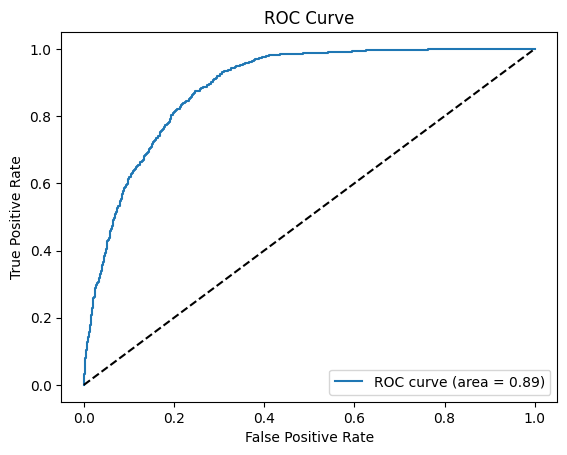

In [13]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


[I 2024-11-04 14:51:34,637] A new study created in memory with name: no-name-6f98ee8a-3abc-4064-b6d8-418b1d401ceb
[I 2024-11-04 14:51:45,821] Trial 0 finished with value: 0.8819536383053219 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 14:52:19,963] Trial 1 finished with value: 0.8707466381388432 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 9, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 14:52:33,013] Trial 2 finished with value: 0.8803311059035721 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 14:52:45,496] Trial 3 finished with value: 0.8825184712928824

Best Hyperparameters: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 7, 'bootstrap': True, 'max_features': 'sqrt'}
Validation Accuracy: 0.7993333333333333
ROC AUC: 0.8877783662598547
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1878
         1.0       0.71      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



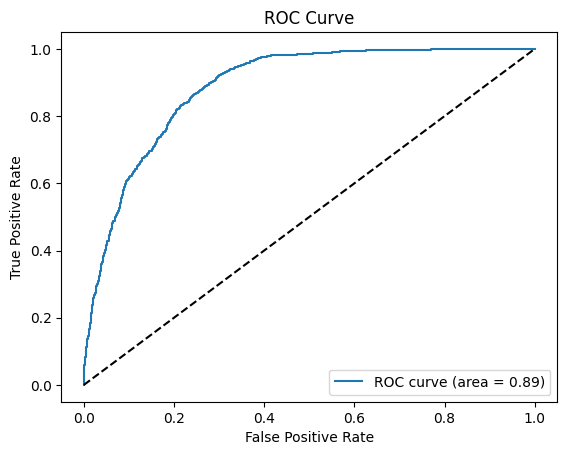

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler

# Load datasets
def load_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    return train_data, test_data

# Feature Engineering for both train and test datasets
def feature_engineering(dataset):
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']
    return dataset

# Objective function for Optuna hyperparameter tuning
def objective(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 30, step=5),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 30, step=2),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }
    model = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(model, X, y, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score

# Function to scale features and split the data
def prepare_data(train_data, top_features):
    X = train_data[top_features]
    y = train_data['smoking']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled, y_train, y_val, scaler

# Train the model with optimal hyperparameters
def train_best_model(X_train, y_train, best_params):
    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    return model

# Plot ROC curve
def plot_roc_curve(y_true, y_proba, roc_auc):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Main script execution
if __name__ == "__main__":
    train_data, test_data = load_data('train.csv', 'test.csv')
    train_data = feature_engineering(train_data)
    test_data = feature_engineering(test_data)
    
    # Define top features for training and testing consistency
    top_features = [col for col in train_data.columns if col not in ['id', 'smoking']]

    # Prepare data
    X_train_scaled, X_val_scaled, y_train, y_val, scaler = prepare_data(train_data, top_features)

    # Hyperparameter tuning with Optuna
    study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train_scaled, y_train), n_trials=50, timeout=600)
    best_params = study.best_params
    print(f"Best Hyperparameters: {best_params}")

    # Train the model with best parameters
    best_rf = train_best_model(X_train_scaled, y_train, best_params)

    # Evaluate on validation set
    y_val_pred = best_rf.predict(X_val_scaled)
    y_val_proba = best_rf.predict_proba(X_val_scaled)[:, 1]
    accuracy = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred)
    
    print(f"Validation Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print("Classification Report:\n", report)
    
    # Plot ROC curve
    plot_roc_curve(y_val, y_val_proba, roc_auc)

    # Prepare and predict on test dataset
    test_features = test_data[top_features]
    test_features_scaled = scaler.transform(test_features)
    test_predictions = best_rf.predict_proba(test_features_scaled)[:, 1]

    # Save predictions to CSV
    test_data['smoking'] = test_predictions
    test_data[['id', 'smoking']].to_csv('test_predictions_optuna_rf__.csv', index=False)


[I 2024-11-04 15:02:26,682] A new study created in memory with name: no-name-8224c4f0-13a6-4f6f-9ddc-8b2048b68b79
[I 2024-11-04 15:02:37,888] Trial 0 finished with value: 0.8819536383053219 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 15:03:22,783] Trial 1 finished with value: 0.8707466381388432 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 9, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 15:03:38,453] Trial 2 finished with value: 0.8803311059035721 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819536383053219.
[I 2024-11-04 15:03:55,670] Trial 3 finished with value: 0.8825184712928824

Best Hyperparameters: {'n_estimators': 900, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 7, 'bootstrap': True, 'max_features': 'sqrt'}
Validation Accuracy: 0.7986666666666666
ROC AUC: 0.8874751081573108
Brier Score: 0.13224538990713142
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1878
         1.0       0.72      0.75      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



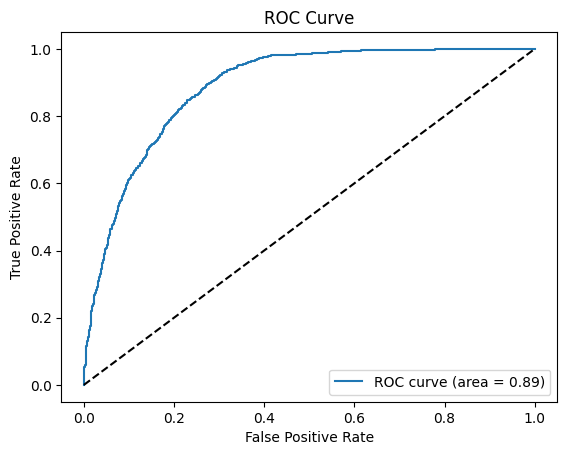

In [16]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

# Train the model with calibration
def train_calibrated_model(X_train, y_train, best_params):
    model = RandomForestClassifier(**best_params, random_state=42)
    calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train, y_train)
    return calibrated_model

# Main script execution with calibration and Brier score
if __name__ == "__main__":
    train_data, test_data = load_data('train.csv', 'test.csv')
    train_data = feature_engineering(train_data)
    test_data = feature_engineering(test_data)
    
    # Define top features for training and testing consistency
    top_features = [col for col in train_data.columns if col not in ['id', 'smoking']]
    
    # Prepare data
    X_train_scaled, X_val_scaled, y_train, y_val, scaler = prepare_data(train_data, top_features)
    
    # Hyperparameter tuning with Optuna
    study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train_scaled, y_train), n_trials=50, timeout=600)
    best_params = study.best_params
    print(f"Best Hyperparameters: {best_params}")
    
    # Train the calibrated model
    calibrated_rf = train_calibrated_model(X_train_scaled, y_train, best_params)
    
    # Evaluate on validation set
    y_val_pred = calibrated_rf.predict(X_val_scaled)
    y_val_proba = calibrated_rf.predict_proba(X_val_scaled)[:, 1]
    accuracy = accuracy_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)
    brier_score = brier_score_loss(y_val, y_val_proba)
    report = classification_report(y_val, y_val_pred)
    
    print(f"Validation Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(f"Brier Score: {brier_score}")
    print("Classification Report:\n", report)
    
    # Plot ROC curve
    plot_roc_curve(y_val, y_val_proba, roc_auc)
    
    # Prepare and predict on test dataset
    test_features = test_data[top_features]
    test_features_scaled = scaler.transform(test_features)
    test_predictions = calibrated_rf.predict_proba(test_features_scaled)[:, 1]
    
    # Save predictions to CSV
    test_data['smoking'] = test_predictions
    test_data[['id', 'smoking']].to_csv('test_predictions_calibrated_rf.csv', index=False)
